Non-Stacked


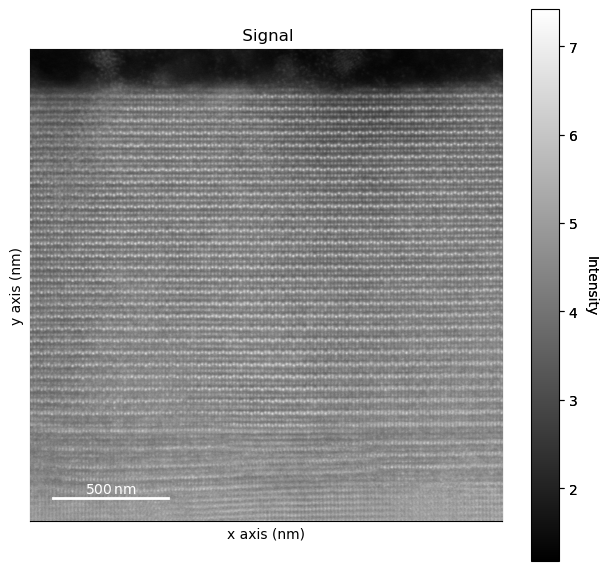

In [10]:
import skimage
import matplotlib.pyplot as plt
import hyperspy.api as hs
import sys
sys.path.append('..')
import util.crop

stack_num = 0 # The index of stacked image

# Change the name of s_load to load different plots.
# Note that some datasets are in stacks and their data will be 3-dimension,
# where the first dimention is the index of a single stacked image. We want to
# look at one image each of the time, so for those stacked images, please change
# stack_num to view different images.

# Load one file at a time.
# These commented files are some that I want think could be reevaluated later for references.
s_load = hs.load('../data/images/Jaume LFO/HAADF_01.dm3')

if len(s_load.data.shape) == 2: # Non-stacked
    print("Non-Stacked")
    s = s_load
else: # Stacked, where s_load.data.shape = 3
    print("Stacked")
    s = s_load.inav[stack_num]

# Plot the image in pixels. We can plot in nanometers by simply doing s.plot().
import copy
s_copy = copy.deepcopy(s)
for ax in s_copy.axes_manager.signal_axes:
    ax.scale = 1.0
    ax.offset = 0.0

plt.close()
s_copy.plot()

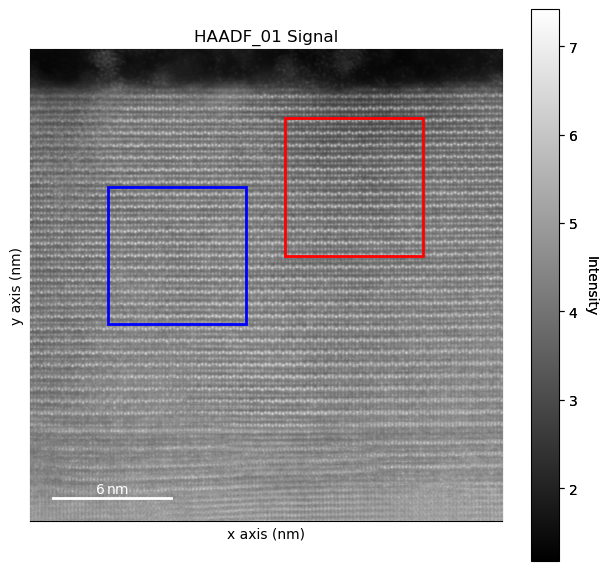

In [11]:
roi1 = hs.roi.RectangularROI(left=1.0, right=8.0, top=-8.5, bottom=-1.5)
roi2 = hs.roi.RectangularROI(left=-8.0, right=-1.0, top=-5.0, bottom=2.0)
s.plot()
sliced_signal1 = roi1.interactive(s, recompute_out_event=None, color='r')
sliced_signal2 = roi2.interactive(s, recompute_out_event=None, color='b')

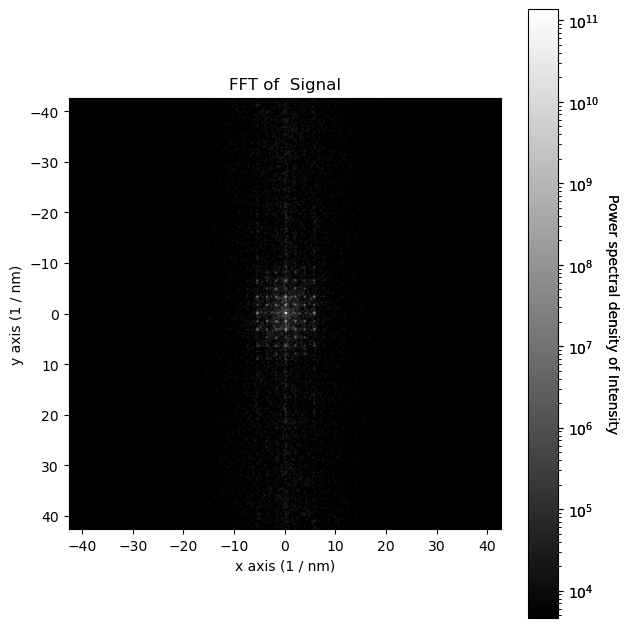

In [12]:
s_fft1 = hs.interactive(sliced_signal1.fft, apodization=True, shift=True, recompute_out_event=None)
s_fft1.plot(True, vmin="85th")

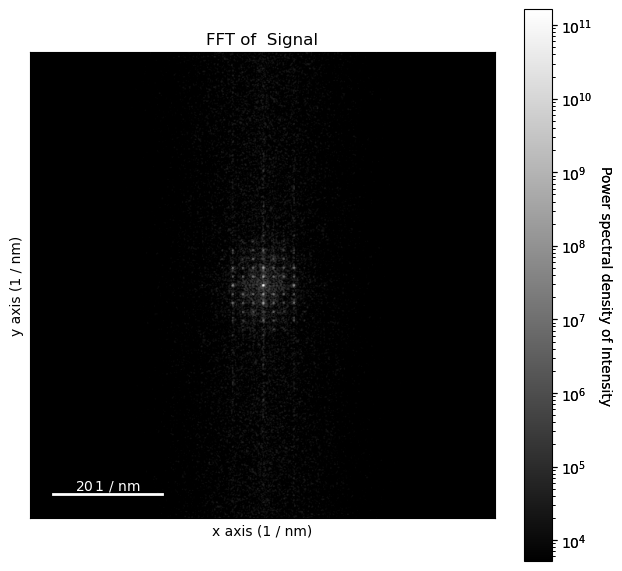

In [13]:
s_fft2 = hs.interactive(sliced_signal2.fft, apodization=True, shift=True, recompute_out_event=None)
s_fft2.plot(True, vmin="85th")

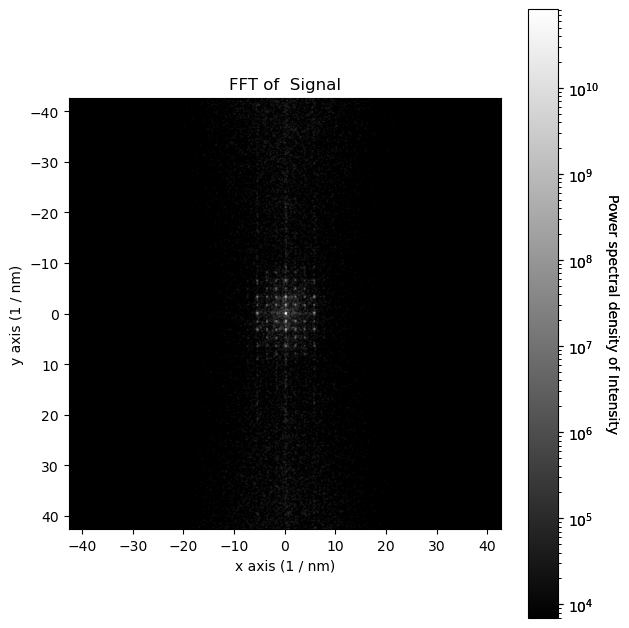

In [29]:
import numpy as np
s_fft2 = s_fft2.rebin(s_fft1.axes_manager.shape)
diff = (s_fft1 - s_fft2)
diff.plot(True, vmin="85th")